In [1]:
import hostphot
print('HostPhot version:', hostphot.__version__)

HostPhot version: 3.0.0


In [18]:
from hostphot.cutouts import set_JWST_image

name = "JWST_TEST"
filt = 'NIRCam_F090W'
file = "../../tests/jw01685-c1008_t004_nircam_clear-f090w_i2d.fits"

set_JWST_image(file, filt, name)

In [19]:
from astropy.io import fits

hdu = fits.open("images/JWST_TEST/JWST/JWST_NIRCam_F090W.fits")
hdu[0].data = hdu[1].data[:,:4599]
hdu.writeto("images/JWST_TEST/JWST/JWST_NIRCam_F090W.fits", overwrite=True)

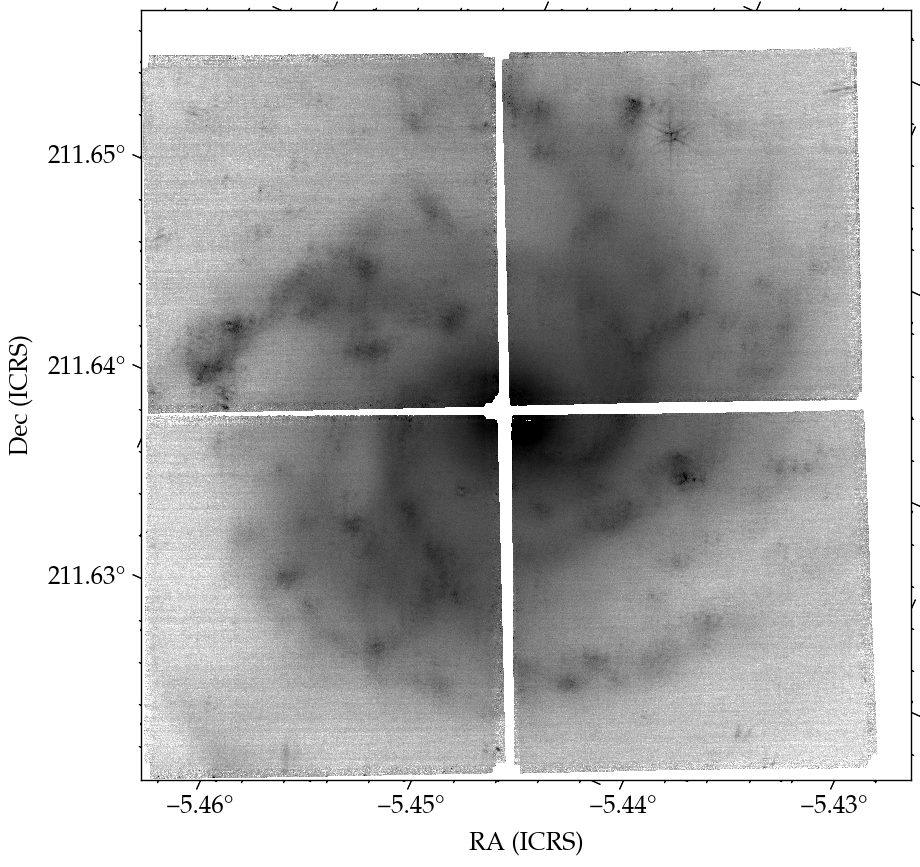

In [20]:
from hostphot.utils import plot_fits
plot_fits(hdu, 0)

In [24]:
from hostphot.processing import masking

host_ra, host_dec = 211.645494, -5.453072 	
masking.create_mask(name, 
                    host_ra, 
                    host_dec, 
                    filt=filt, 
                    survey="JWST",
                    # masking parameters
                    threshold=200,  # high value to detect few source as we don't really want to mask part of the galaxy
                    sigma=12,  # width of the Gaussian kernel - not too small to fill in the large gaps
                    r=1,  # make the detected sources as little as possible
                    crossmatch=True,  # as there are no stars in front of the host, this will not detect any sources (we don't want to mask the galaxy itself)
                    # other parameters
                    save_plots=True,  # False by default as it takes some time to create the figure
                    save_mask_params=True,  # to use the output on the other images - False by default
                    save_input=True,  # True by default
                   )